In [171]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve, root

In [173]:
f = lambda x: -2*x*np.sin(x) + 15
x = np.linspace(-8, 8, 200)
y = f(x)

x1 = 0
x2 = 4

area = quad(f, x1, x2)
area

(56.28445602370696, 6.248829900602155e-13)

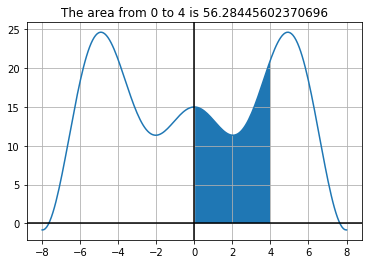

In [170]:
fix, ax = plt.subplots()
plt.grid(True)
ax.plot(x, y)
xstart = x[x>0]
xstart = xstart[xstart<4]
plt.fill_between(xstart, f(xstart))
plt.title(f"The area from {x1} to {x2} is {area[0]}")
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

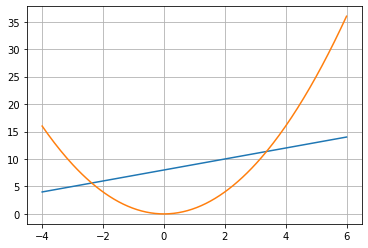

In [188]:
f = lambda x: x+8
g = lambda x: x**2
h = lambda x: f(x)-g(x)

x = np.linspace(-4, 6, 200)
y1 = f(x)
y2 = g(x)
y3 = h(x)
plt.plot(x, y1, x, y2)
plt.grid(True)

In [184]:
#find where the functions intersect
roots = root(h, (-1, 5), method="hybr").x
x1 = roots[0]
x2 = roots[1]
area = quad(h, x1, x2)
area

[-2.37228132  3.37228132]


(31.595094555959154, 3.507760144123479e-13)

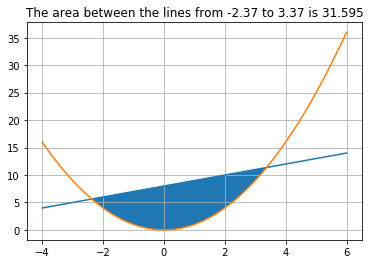

In [161]:
left_region = x > x1
right_region = x < x2
region = left_region & right_region

plt.plot(x, y1, x, y2)
plt.fill_between(x, y1, y2, where=region)
plt.grid(True)
plt.title(f"The area between the lines from {round(x1, 2)} to {round(x2, 2)} is {round(area[0], 3)}")
plt.show()

In [177]:
#do it symbolically
import sympy as sy

x = sy.symbols("x")
F = x + 8
G = x**2
H = F - G
H

-x**2 + x + 8

In [179]:
roots = sy.solve(H)
roots

[1/2 - sqrt(33)/2, 1/2 + sqrt(33)/2]

In [185]:
A = sy.integrate(F) - sy.integrate(G)
A

-x**3/3 + x**2/2 + 8*x

In [181]:
area = A.subs(x, roots[0]) - A.subs(x, roots[1])
area

-8*sqrt(33) - (1/2 + sqrt(33)/2)**2/2 + (1/2 - sqrt(33)/2)**2/2 - (1/2 - sqrt(33)/2)**3/3 + (1/2 + sqrt(33)/2)**3/3

In [182]:
area.evalf()

-31.5950945559592